<a href="https://colab.research.google.com/github/thewLHE/Python/blob/P-AI/DNN_pra_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#module importing

In [3]:
import numpy as np#수이 데이터를 다루는 파이썬 패키지
import pandas as pd#파이썬 데이터 처리를 위한 라이브러리
import matplotlib.pyplot as plt

import tensorflow as tf#머신러닝 프레임 워크
from tensorflow import keras#라이브러리로 프로토 타이핑시 유용
from tensorflow.keras import optimizers
#기본적으론 손실함수를 통해 얻은 손실값으로부터 모델을 업데이트 하는 방식
from tensorflow.keras.layers import Dense, Input
#Dense :이 레이어의 각 뉴런이 이전 계층의 모든 뉴런으로 입력을 받음(추출된 정보들을 하나의 레이어로 모으고 원하는 차원으로 축소하기 위한 레이어) 
#즉, 중간 퍼셉트론 /Input에서 입력의 크기를 정의함
import time

#DNN구성하기 위한 최소 코드

##데이터 준비

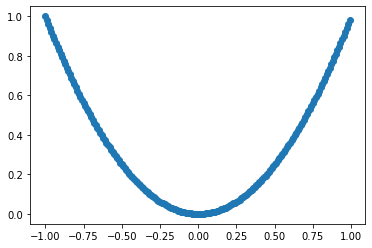

In [6]:
x=np.arange(-1,1,0.01)
y=x**2
plt.scatter(x,y)#이를 이용해서 산점도 그림

##구성 코드
- 모델정의 
- 컴파일: 모델 + optimzer + loss(loss최소화를 위하여)
- 학습
- 예측
- 결과확인

https://keras.io/ko/getting-started/sequential-model-guide/

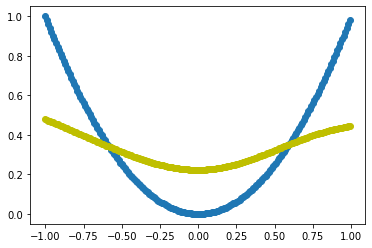

In [7]:
#모델 정의
model=keras.Sequential()
#Sequential모델을 이용해 레이어를 선형으로 연결하여 구성
model.add(Input(1))#add를 이용해 레이어를 추가
model.add(Dense(10,activation='tanh'))#뉴런의 수는 10, 활성 함수는 'tanh'
model.add(Dense(10,activation='tanh'))
model.add(Dense(1))

#컴파일 
model.compile(optimizer="SGD",loss="mse")#이는 모델의 성능을 평가하는데 사용되는 함수
#optimizer : 훈련 과정을 설정 / loss : 최적화 과정에서 최소화 될 손실함수 를 설정

#학습
model.fit(x,y,epochs=100,verbose=0,batch_size=32)#주어진 epoch 수만큼 모델을 학습시키는 메서드
#batch_size : 한번에 사용해야 하는 트레이닝 데이터의 크기를 지정하는 것
#verbose : 학습 진행 상황에 대한 출력 여부 지정[0:slient, 1:progress bar, 2:one line per epoch]

#예측
y_=model.predict(x)#테스트 이미지의 분류 결과를 예측 / 반환값 =예측확률

#결과 그래프로 보기
plt.scatter(x,y)#answer
plt.scatter(x,y_,color="y")#result(predict)
plt.show()

#기본으로 사용되는 것

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 2ms/step - loss: 0.0128 - mae: 0.0874
loss= 0.012760004960000515
mae= 0.08739562332630157


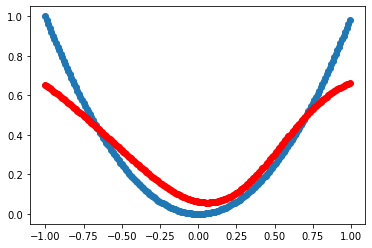

In [8]:
#model.compile(optimizer="SGD",loss="mse")
model.compile(optimizer="SGD",loss="mse",metrics=["mae"])
#metrics : 훈련을 모니터링 하기 위한 코드

model.fit(x,y,epochs=100,verbose=0,batch_size=30)

loss, mae=model.evaluate(x,y)#evaluate() #데이터 세트를 입력하여 성능을 평가 / 반환값 =정확도등의 Metrics
print("loss=",loss)
print("mae=",mae)

y_ = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()


##데이터 분리(train / test)
테스트셋으로 평가하기

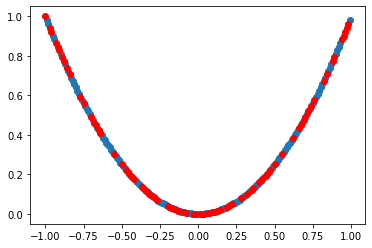

In [14]:
np.random.shuffle(x)
split_index=int(x.shape[0]*0.6)
y=x**2

train_x, test_x=x[:split_index],x[split_index:]
train_y, test_y=y[:split_index],y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y,color="r")
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

##학습 시간을 출력(경과 시간)

In [15]:
start_time=time.time()#ADD #현재 컴퓨터의 시각

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time)) # ADD



elapsed : 10.277187824249268


##네트워크의 모양 보기

In [16]:
model = keras.Sequential(name="my_model")
model.add(Input(1,name="input"))
model.add(Dense(10, activation='tanh',name="hidden1"))
model.add(Dense(10, activation='tanh',name="hidden2"))
model.add(Dense(1,name="output"))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # ADD / 레이어 이름은 자동으로 주어진다. (,나오는 출력층) 업데이트 하는 weight 숫자


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 10)                20        
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


노드 10개 / 노드 10개를 갖는 은닉층 2개가 있음
모든 레이어는 activation(w*x+b) 의 형태


첫 번 째 은닉층은 20개( = ((1+1)*10) = (입력수+1)*10)의 웨이트를,

두 번 째 은닉층은 110개( = ( (10+1)*10) )의 웨이트가 있다.. 

##모델 그리기

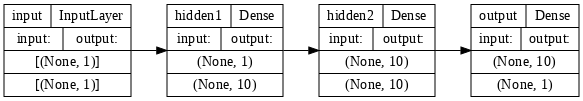

In [17]:
tf.keras.utils.plot_model(model=model, rankdir="LR", dpi=72, show_shapes=True)
#show shape - input&output보여주는 여부,rankdir - 보여주는 형식


##결과저장

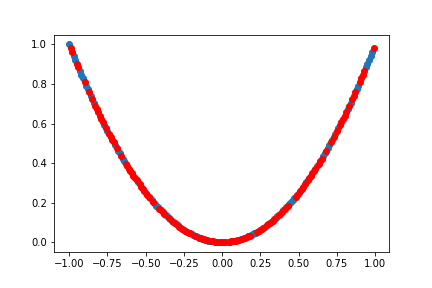

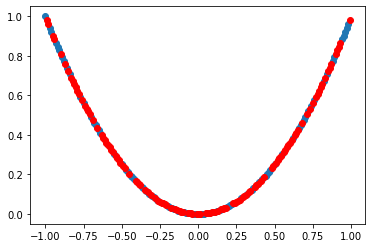

In [21]:
plt.scatter(test_x,test_y)
plt.scatter(train_x,train_y,color='r')
plt.savefig("base_result.png")#그래프를 이미지 파일로 저장한다.

from IPython.display import Image
display(Image("base_result.png"))#특정파일을 읽는 것

#Keras의 DNN Template


1. 모델 정의
2. 모델 컴파일
3. 학습 
4. 평가
5. 예측



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time))

# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()